In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

DEPRECATION: Loading egg at c:\users\anmol rao\anaconda3\lib\site-packages\pygcn-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\anmol rao\anaconda3\lib\site-packages\torch-2.1.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [58]:
!pip install opencv-python

DEPRECATION: Loading egg at c:\users\anmol rao\anaconda3\lib\site-packages\pygcn-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\anmol rao\anaconda3\lib\site-packages\torch-2.1.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import cv2 
import numpy as np

In [14]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [42]:
mnist_model = models.Sequential()
mnist_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
mnist_model.add(layers.MaxPooling2D((2, 2)))
mnist_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
mnist_model.add(layers.MaxPooling2D((2, 2)))
mnist_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
mnist_model.add(layers.Flatten())
mnist_model.add(layers.Dense(64, activation='relu'))
mnist_model.add(layers.Dense(10, activation='softmax'))

mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
model_data = mnist_model.fit(X_train, Y_train, epochs=epochs, batch_size=100, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 5s 9ms/step - loss: 0.2466 - accuracy: 0.9257 - val_loss: 0.0866 - val_accuracy: 0.9741
Epoch 2/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0628 - accuracy: 0.9810 - val_loss: 0.0683 - val_accuracy: 0.9794
Epoch 3/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0563 - val_accuracy: 0.9844
Epoch 4/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 5/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0484 - val_accuracy: 0.9862
Epoch 6/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0426 - val_accuracy: 0.9885
Epoch 7/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0414 - val_accuracy: 0.9891
Epoch 

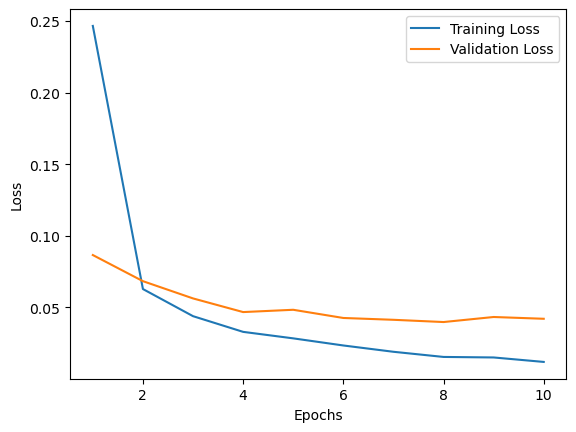

In [44]:
n_epochs = range(1,epochs+1)
plt.plot(n_epochs, model_data.history['loss'], label='Training Loss')
plt.plot(n_epochs, model_data.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = mnist_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0335 - accuracy: 0.9907


In [49]:
vid = cv2.VideoCapture(0) 

while(True): 
    ret, frame = vid.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, 28, 28, 1))
    prediction = mnist_model.predict(reshaped)
    predicted_digit = np.argmax(prediction)
    cv2.putText(frame, f'Digit is: {predicted_digit}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.imshow('frame', frame) 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release() 
cv2.destroyAllWindows() 

1/1 [==============================] - 0s 11ms/step
